In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 对网络 G 进行可视化
def plot_graph(G):
  fig, ax = plt.subplots(figsize = (12, 8))
  # plt.figure()
  pos = nx.spring_layout(G)
  edges = G.edges()
  # nx.draw_networkx(G, pos, edges = edges)
  nx.draw_networkx_nodes(G, pos, nodelist = G.nodes(), node_size = 300, node_color = 'r', alpha = 0.8)
  nx.draw_networkx_edges(G, pos, edgelist = edges, alpha = 0.4)
  nx.draw_networkx_labels(G, pos, font_size = 10, ax = ax)
  plt.show()

In [3]:
import os 
data_path = os.environ.get('DATA_PATH') + 'AI_Cheats/'

# 数据加载，构造图
G = nx.read_gml(data_path + 'LPA/football.gml')
print(G)
print(type(G))

Graph with 115 nodes and 613 edges
<class 'networkx.classes.graph.Graph'>


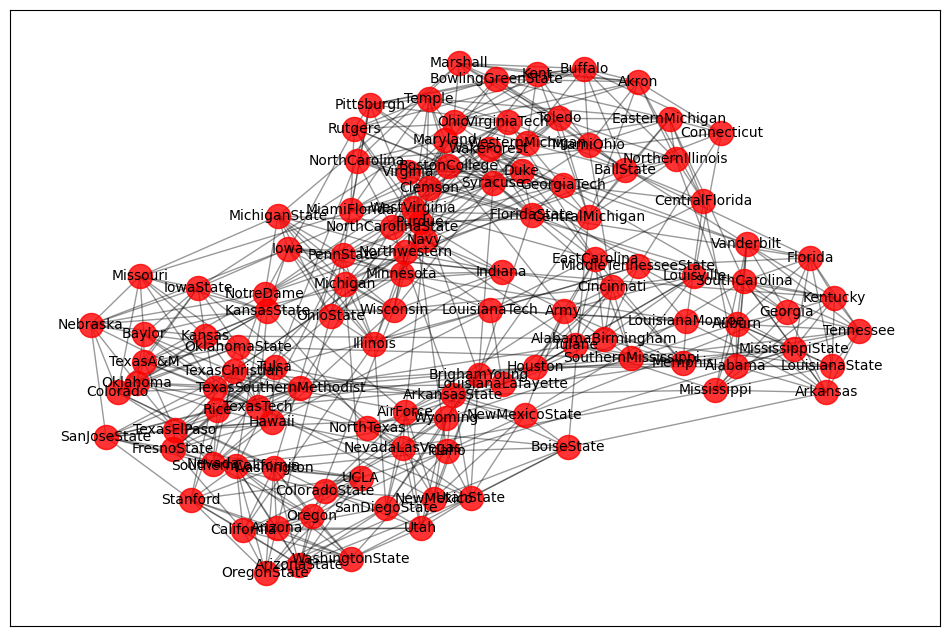

['BrighamYoung', 'FloridaState', 'Iowa', 'KansasState', 'NewMexico', 'TexasTech', 'PennState', 'SouthernCalifornia', 'ArizonaState', 'SanDiegoState', 'Baylor', 'NorthTexas', 'NorthernIllinois', 'Northwestern', 'WesternMichigan', 'Wisconsin', 'Wyoming', 'Auburn', 'Akron', 'VirginiaTech', 'Alabama', 'UCLA', 'Arizona', 'Utah', 'ArkansasState', 'NorthCarolinaState', 'BallState', 'Florida', 'BoiseState', 'BostonCollege', 'WestVirginia', 'BowlingGreenState', 'Michigan', 'Virginia', 'Buffalo', 'Syracuse', 'CentralFlorida', 'GeorgiaTech', 'CentralMichigan', 'Purdue', 'Colorado', 'ColoradoState', 'Connecticut', 'EasternMichigan', 'EastCarolina', 'Duke', 'FresnoState', 'OhioState', 'Houston', 'Rice', 'Idaho', 'Washington', 'Kansas', 'SouthernMethodist', 'Kent', 'Pittsburgh', 'Kentucky', 'Louisville', 'LouisianaTech', 'LouisianaMonroe', 'Minnesota', 'MiamiOhio', 'Vanderbilt', 'MiddleTennesseeState', 'Illinois', 'MississippiState', 'Memphis', 'Nevada', 'Oregon', 'NewMexicoState', 'SouthCarolina', 

In [4]:
# 可视化
plot_graph(G)
print(list(G.nodes()))
print(G.nodes['BrighamYoung']['value'])

In [5]:
# 构建 GCN，计算 A_hat 和 D_hat 矩阵
# 按照字母顺序排序
order = sorted(list(G.nodes()))
print(order)

# 邻接矩阵
A = nx.to_numpy_array(G, nodelist = order)
print(A)

['AirForce', 'Akron', 'Alabama', 'AlabamaBirmingham', 'Arizona', 'ArizonaState', 'Arkansas', 'ArkansasState', 'Army', 'Auburn', 'BallState', 'Baylor', 'BoiseState', 'BostonCollege', 'BowlingGreenState', 'BrighamYoung', 'Buffalo', 'California', 'CentralFlorida', 'CentralMichigan', 'Cincinnati', 'Clemson', 'Colorado', 'ColoradoState', 'Connecticut', 'Duke', 'EastCarolina', 'EasternMichigan', 'Florida', 'FloridaState', 'FresnoState', 'Georgia', 'GeorgiaTech', 'Hawaii', 'Houston', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'IowaState', 'Kansas', 'KansasState', 'Kent', 'Kentucky', 'LouisianaLafayette', 'LouisianaMonroe', 'LouisianaState', 'LouisianaTech', 'Louisville', 'Marshall', 'Maryland', 'Memphis', 'MiamiFlorida', 'MiamiOhio', 'Michigan', 'MichiganState', 'MiddleTennesseeState', 'Minnesota', 'Mississippi', 'MississippiState', 'Missouri', 'Navy', 'Nebraska', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthCarolina', 'NorthCarolinaState', 'NorthTexas', 'NorthernIllinois', '

In [6]:
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
print(I)
A_hat = A + I
print(A_hat)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]]


In [7]:
# D_hat 为 A_hat 的度矩阵
D_hat = np.sum(A_hat, axis=0)
print('D_hat: \n', D_hat)

D_hat: 
 [11. 12. 12. 11. 12. 12. 11. 11. 12. 12. 11. 11. 10. 12. 12. 13. 12. 12.
  9. 12. 12. 11. 12. 11.  8. 12. 12. 12. 12. 13. 12. 11. 12. 12. 12. 10.
 12. 12. 13. 12. 11. 13. 11. 11.  9.  9. 11. 11. 11. 11. 12. 12. 11. 12.
 12. 12. 10. 12. 12. 12. 11. 12. 12. 13. 13. 12. 12. 12. 12. 11. 11. 12.
 12. 11. 12. 12. 11. 12. 11. 13. 12. 12. 12. 11. 12. 12. 12. 13. 13. 11.
 12. 12. 12. 12. 12. 12. 12. 12. 13. 10. 12. 13. 12. 12. 10. 12. 11. 12.
 11. 12. 12. 12. 11. 13. 12.]


In [8]:
# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat: \n', D_hat)

D_hat: 
 [[11.  0.  0. ...  0.  0.  0.]
 [ 0. 12.  0. ...  0.  0.  0.]
 [ 0.  0. 12. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 11.  0.  0.]
 [ 0.  0.  0. ...  0. 13.  0.]
 [ 0.  0.  0. ...  0.  0. 12.]]


In [9]:
# 初始化权重，normal 正太分布 loc 均值，scale 标准差
# 第一层神经元， 4 个维度
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))

# 第二层神经元，4 => 2
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1: \n', W_1)
print('W_2: \n', W_2)

W_1: 
 [[ 1.11762153  1.28241628  0.11317219 -0.61251895]
 [-0.69348869 -1.21330919 -1.13807818  0.39834628]
 [-1.18546414 -0.94573688  0.17514107 -0.77507665]
 [-2.09130118  0.03524355 -1.48817208  0.4978745 ]
 [ 0.89011248 -0.68816158 -0.31960564  2.55454051]
 [-0.026222   -0.97055874  0.28576446  2.46850127]
 [-0.57707383  0.13136444 -0.69455887  1.95975756]
 [-0.00650944  1.87710814 -0.5624366  -0.9124016 ]
 [ 0.84426     0.04780856 -0.90428594  0.59379821]
 [ 1.8226438  -2.69900179  0.02803934  1.81233843]
 [-0.6601477  -0.41135818 -1.49555625 -0.27270404]
 [ 1.48559819  0.8336485  -0.60997966  0.53229896]
 [-0.26945273  1.32098646  2.40301313 -0.93116759]
 [-0.41486697 -0.51540481 -1.14507412 -0.56876556]
 [-1.38640067  0.96222406  0.79559512  0.85655099]
 [ 0.26105279 -0.29683233 -2.23035961  0.32064036]
 [-0.55992312 -0.74270116 -0.93856373  0.91892762]
 [-0.89783004 -1.4837661   0.18102126  0.24462384]
 [-0.39652895 -0.00541368 -0.31008299  0.55586605]
 [-1.96412136  0.4764896

In [10]:
# 当 x<0 时，结果 = 0，x >= 0 时，结果 = x
def relu(x):
  return (abs(x)+x) / 2

In [11]:
# 叠加 GCN 层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一

def gcn_layer(A_hat, D_hat, X, W):
  return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output: \n', output)

output: 
 [[0.23603352 0.07439379]
 [0.         0.35844701]
 [0.         0.19510787]
 [0.         0.10298019]
 [0.         0.39652231]
 [0.         0.36943338]
 [0.         0.18978437]
 [0.20597394 0.14885632]
 [0.26725448 0.08767369]
 [0.         0.24045402]
 [0.         0.22576456]
 [0.         0.00643597]
 [0.30459387 0.18779409]
 [0.0655363  0.20905498]
 [0.         0.35092078]
 [0.10770781 0.10430953]
 [0.         0.33204008]
 [0.         0.34378374]
 [0.         0.42251497]
 [0.         0.2666961 ]
 [0.0506524  0.06649741]
 [0.         0.12532163]
 [0.         0.12594551]
 [0.05742928 0.06898733]
 [0.         0.17662631]
 [0.         0.13716252]
 [0.1059781  0.0806746 ]
 [0.         0.30947243]
 [0.         0.10102176]
 [0.         0.15591131]
 [0.         0.48607471]
 [0.         0.10819784]
 [0.         0.23171306]
 [0.         0.41481482]
 [0.0346603  0.08238441]
 [0.27267486 0.28927926]
 [0.         0.18601977]
 [0.         0.0257155 ]
 [0.         0.17725475]
 [0.         0.

In [12]:
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
  feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations: \n', feature_representations)

feature_representations: 
 {'BrighamYoung': array([0.23603352, 0.07439379]), 'FloridaState': array([0.        , 0.35844701]), 'Iowa': array([0.        , 0.19510787]), 'KansasState': array([0.        , 0.10298019]), 'NewMexico': array([0.        , 0.39652231]), 'TexasTech': array([0.        , 0.36943338]), 'PennState': array([0.        , 0.18978437]), 'SouthernCalifornia': array([0.20597394, 0.14885632]), 'ArizonaState': array([0.26725448, 0.08767369]), 'SanDiegoState': array([0.        , 0.24045402]), 'Baylor': array([0.        , 0.22576456]), 'NorthTexas': array([0.        , 0.00643597]), 'NorthernIllinois': array([0.30459387, 0.18779409]), 'Northwestern': array([0.0655363 , 0.20905498]), 'WesternMichigan': array([0.        , 0.35092078]), 'Wisconsin': array([0.10770781, 0.10430953]), 'Wyoming': array([0.        , 0.33204008]), 'Auburn': array([0.        , 0.34378374]), 'Akron': array([0.        , 0.42251497]), 'VirginiaTech': array([0.       , 0.2666961]), 'Alabama': array([0.0506524

In [13]:
# 不同节点 value, 绘制不同的颜色
def getValue(value):
  colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
  return colorList[int(value)]

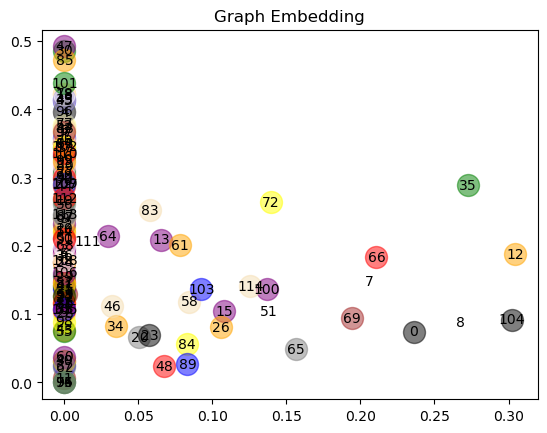

In [14]:
# 绘制 output，节点 GCN Embedding 可视化
def plot_node(output, title):
  for i in range(len(nodes)):
    node_name = nodes[i]
    value = G.nodes[node_name]['value']
    plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i), color=getValue(value), alpha=0.5, s=250)
    plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
  plt.title(title)
  plt.show()

plot_node(output, 'Graph Embedding')

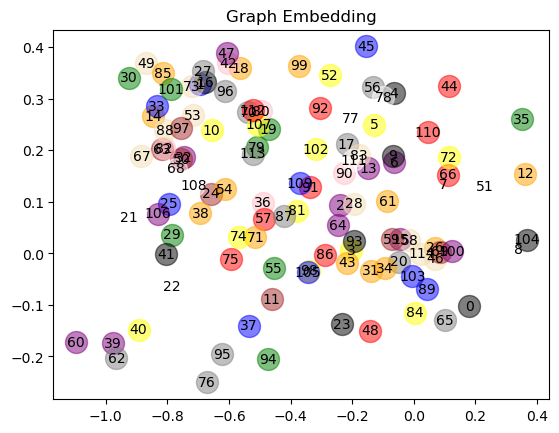

In [15]:
# 尝试去掉激活函数 relu, 重新运行一遍，效果可能会更好
def gcn_layer2(A_hat, D_hat, X, W):
  return D_hat**-1 * A_hat * X * W

H_3 = gcn_layer2(A_hat, D_hat, I, W_1)
H_4 = gcn_layer2(A_hat, D_hat, H_3, W_2)
output2 = H_4
plot_node(output2, 'Graph Embedding')